In [68]:
import matplotlib.pyplot as plt

In [55]:
import sys
sys.path.insert(0, '../')
import fconcrete as fc
from fconcrete import config, duplicated, Material, Beam, Load, Node, ConcreteBeam, BeamElement, Rectangle, Concrete, Section
from pytest import approx
e = config.e
import numpy as np


In [ ]:
fc.API('''


''')

In [61]:
def get_ftool_fconcrete_comparisson(beam, file_shear, file_momentum, file_displacement):
    
    x_shear, shear_diagram_v47 = np.loadtxt(file_shear).T             
    not_duplicated_x = ~duplicated(x_shear)
    x_shear = x_shear[not_duplicated_x][1:-1]
    shear_diagram_v47 = shear_diagram_v47[not_duplicated_x][1:-1]
    shear_fconcrete = beam.getInternalShearStrength(x_shear)


    x_momentum, momentum_diagram_v47 = np.loadtxt(file_momentum).T
    not_duplicated_x = ~duplicated(x_momentum)
    x_momentum = x_momentum[not_duplicated_x][1:-1]
    momentum_diagram_v47 = momentum_diagram_v47[not_duplicated_x][1:-1]
    momentum_fconcrete = beam.getInternalMomentumStrength(x_momentum)

    x_ftool, _, displacement_diagram_v47, rotation_diagram_v47 = np.loadtxt(file_displacement).T
    not_duplicated_x = ~duplicated(x_ftool)

    not_duplicated_x_displacement = not_duplicated_x & ~(displacement_diagram_v47 == 0)
    x_displacement = x_ftool[not_duplicated_x_displacement]
    displacement_diagram_v47 = displacement_diagram_v47[not_duplicated_x_displacement]
    displacement_fconcrete = beam.getDisplacement(x_displacement)*10

    x_rotation = x_ftool[not_duplicated_x]
    rotation_diagram_v47 = rotation_diagram_v47[not_duplicated_x]
    rotation_fconcrete = beam.getRotation(x_rotation)

    return (shear_diagram_v47, shear_fconcrete), (momentum_diagram_v47, momentum_fconcrete), (displacement_diagram_v47, displacement_fconcrete), (rotation_diagram_v47, rotation_fconcrete) 
    


In [62]:

def compare(beam, name):
    shear_info, momentum_info, displacement_info, rotation_info = get_ftool_fconcrete_comparisson(beam,
                                    r"../tests/structural/{}/shear.txt".format(name),
                                    r"../tests/structural/{}/momentum.txt".format(name),
                                    r"../tests/structural/{}/displacement.txt".format(name))
    
    shear_diagram_v47, shear_fconcrete = shear_info
    momentum_diagram_v47, momentum_fconcrete = momentum_info
    displacement_diagram_v47, displacement_fconcrete = displacement_info
    rotation_diagram_v47, rotation_fconcrete = rotation_info
    
    assert shear_diagram_v47 == approx(shear_fconcrete, abs=0.000001)
    assert momentum_fconcrete == approx(momentum_diagram_v47, abs=0.0001)
    assert rotation_diagram_v47 == approx(rotation_fconcrete, abs=0.0000001)
    assert displacement_diagram_v47 == approx(displacement_fconcrete, abs=0.000001)


In [63]:
def test_crimped_simple_supported():
    material = Material(E='27000 MPa', poisson=1, alpha=1)
    section = Rectangle(25,44.6)

    f1 = Load.UniformDistributedLoad(-0.1622, x_begin=0, x_end=113)

    n1 = Node.Crimp(x=0)
    n2 = Node.SimpleSupport(x=113)

    bar1 = BeamElement([n1, n2], section, material)

    beam = Beam(
        loads = [f1],
        beam_elements = [bar1]
    )
    compare(beam=beam, name="crimped_simple_supported")

In [64]:
test_crimped_simple_supported()

In [65]:
name = "crimped_simple_supported"

In [66]:
shear_info, momentum_info, displacement_info, rotation_info = get_ftool_fconcrete_comparisson(beam,
                                    r"../tests/structural/{}/shear.txt".format(name),
                                    r"../tests/structural/{}/momentum.txt".format(name),
                                    r"../tests/structural/{}/displacement.txt".format(name))
    
shear_diagram_v47, shear_fconcrete = shear_info
momentum_diagram_v47, momentum_fconcrete = momentum_info
displacement_diagram_v47, displacement_fconcrete = displacement_info
rotation_diagram_v47, rotation_fconcrete = rotation_info

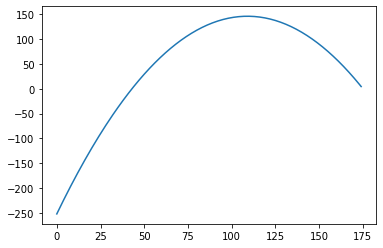

In [70]:
plt.plot(momentum_diagram_v47)

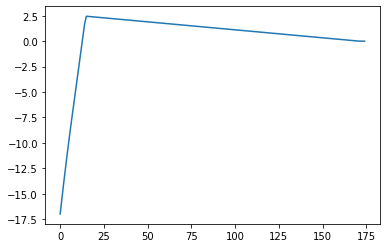

In [71]:
plt.plot(momentum_fconcrete)

In [53]:

n1 = fc.Node.Crimp(x=0)
n2 = fc.Node.SimpleSupport(x=110)

f1 = fc.Load.PontualLoad(-2, x=10)
f2 = fc.Load.UniformDistributedLoad(-0.1, x_begin=0, x_end=5)

section = fc.Rectangle(12, 25)
material = fc.Material(E=10**6, poisson=1, alpha=1)

beam_element_1 = fc.BeamElement([n1, n2], section, material)

beam = fc.Beam(loads=[f1, f2], beam_elements=[beam_element_1])


(<matplotlib.axes._subplots.AxesSubplot at 0x119e187c0>,
 <ezdxf.layouts.layout.Modelspace at 0x119f805b0>)

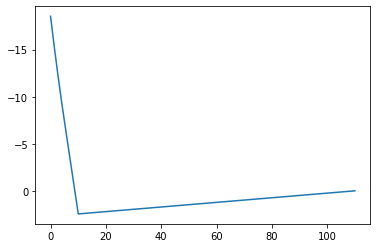

In [54]:
beam.plotMomentumDiagram()

In [3]:
import json

In [17]:
from fconcrete import config, duplicated, Material, Beam, Load, Node, ConcreteBeam, BeamElement, Rectangle, Concrete, Section


In [43]:
material = fc.Material(E=1, poisson=0.3, alpha=1)
section = Rectangle(12,100)
f1 = Load.PontualLoad(-1, x=50)
n1 = Node.Crimp(x=0)
n2 = Node.SimpleSupport(x=100)
bar1 = BeamElement([n1, n2], section, fc.Concrete(30, 2))
concrete_beam = fc.ConcreteBeam(
    loads = [f1],
    beam_elements = [bar1],
    consider_own_weight=False
)

(<matplotlib.axes._subplots.AxesSubplot at 0x1214165b0>,
 <ezdxf.layouts.layout.Modelspace at 0x1215489a0>)

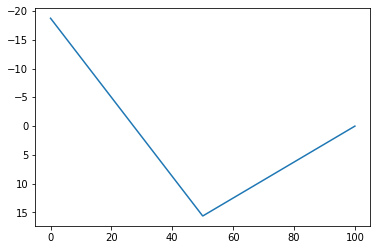

In [44]:
concrete_beam.plotMomentumDiagram()

In [45]:
material = fc.Material(E=1, poisson=0.3, alpha=1)
section = Rectangle(12,100)
f1 = Load.PontualLoad(-1, x=50)
n1 = Node.Crimp(x=0)
n2 = Node.SimpleSupport(x=100)
bar1 = BeamElement([n1, n2], section, material)
beam = fc.Beam(
    loads = [f1],
    beam_elements = [bar1]
)

(<matplotlib.axes._subplots.AxesSubplot at 0x12156ba60>,
 <ezdxf.layouts.layout.Modelspace at 0x12160a6d0>)

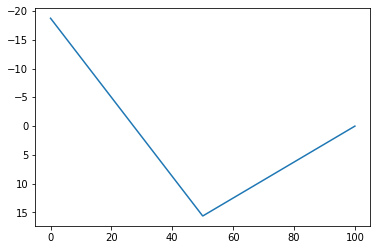

In [46]:
beam.plotMomentumDiagram()

In [10]:
a.concrete_beam.getInternalMomentumStrength(111)

0

In [30]:
concrete_beam_data = json.loads(income_text)["ConcreteBeam"]
if concrete_beam_data:
    nodes = [getattr(fc.Node, node["type"])(x=node["x"], length=node["length"]) for node in concrete_beam_data["nodes"]]

    def getLoad(load_dict):
        if load_dict["type"] == "UniformDistributedLoad":
            return fc.Load.UniformDistributedLoad(x_begin=load_dict["x_begin"], x_end=load_dict["x_end"], q=load_dict["q"])
        if load_dict["type"] == "PontualLoad":
            return fc.Load.PontualLoad(x=load_dict["x"], load=load_dict["load"])

    loads = [getLoad(load) for load in concrete_beam_data["loads"]]
    width, height = concrete_beam_data["section"]["width"], concrete_beam_data["section"]["height"]
    other_parameters = { k:v for (k, v) in concrete_beam_data.items() if not k in ["nodes", "loads", "section"]}

    concrete_beam = fc.ConcreteBeam(
            loads = loads,
            nodes = nodes,
            section = fc.Rectangle(width,height),
            **other_parameters
    )

TypeError: Free() got an unexpected keyword argument 'length'

In [22]:
a.status

"'length'"

In [62]:
mem = io.BytesIO()
mem.write(proxyIO.getvalue().encode("utf-8"))
mem.seek(0)

0

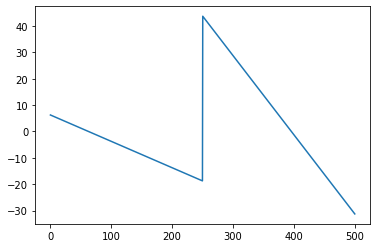

In [3]:
ax.figure

(<matplotlib.axes._subplots.AxesSubplot at 0x10a45f2e0>,
 <ezdxf.layouts.layout.Modelspace at 0x11f1dcfa0>)

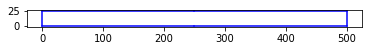

In [2]:
beam.plot()

In [10]:
base, altura, comprimento = 20, 40, 300
area_laje = comprimento*comprimento
carga_na_laje = fc.to_unit(5, "kN/m**2", "kN/cm**2")
carga_na_viga = -(carga_na_laje*area_laje/comprimento)/4
carga_distribuida_na_viga = fc.Load.UniformDistributedLoad(carga_na_viga, x_begin=0, x_end=comprimento)
n1 = fc.Node.SimpleSupport(x=0, length=20)
n2 = fc.Node.SimpleSupport(x=30, length=20)
n3 = fc.Node.SimpleSupport(x=200, length=20)
n4 = fc.Node.SimpleSupport(x=300, length=20)
beam_element1 = fc.BeamElement([n1, n2], section=fc.Rectangle(20, 50), material=fc.Concrete(30, 1))
beam_element2 = fc.BeamElement([n2, n3], section=fc.Rectangle(20, 80), material=fc.Concrete(30, 1))
beam_element3 = fc.BeamElement([n3, n4], section=fc.Rectangle(20, 40), material=fc.Concrete(30, 1))
beam = fc.ConcreteBeam(
    fck = 30,
    loads = [carga_distribuida_na_viga],
    beam_elements = [beam_element1, beam_element2, beam_element3],
    division = 200,
    consider_own_weight = True,

)

self = beam

In [ ]:
{
                                "q": -0.3,
                                "x_begin": 0,
                                "x_end": 400,
                                "type": "UniformDistributedLoad"
                            },
                            {
                                "load": -0.5,
                                "x": 150,
                                "type": "PontualLoad"
                            }

In [55]:
n1 = fc.Node.SimpleSupport(x=0, length=20)
n2 = fc.Node.Crimp(x=400, length=20)
section = fc.Rectangle(30, 80)
l1 = fc.Load.UniformDistributedLoad(-0.3, 0, 400)
l2 = fc.Load.PontualLoad(-0.5, 150)

beam = fc.ConcreteBeam(
    nodes = [n1, n2],
    loads = [l1, l2],
    section = section,
)

self = beam

TypeError: __init__() missing 1 required positional argument: 'beam_elements'

(<matplotlib.axes._subplots.AxesSubplot at 0x122d24370>,
 <ezdxf.layouts.layout.Modelspace at 0x122cd8dc0>)

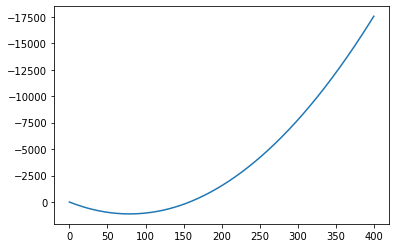

In [52]:
self.plotMomentumDiagram()


In [43]:
API = fc.API('''

                {
                    "ConcreteBeam": {
                        "section": {
                            "width": 30,
                            "height": 80,
                            "type": "Rectangle"
                        },
                        "nodes": [
                            {
                                "x": 0,
                                "length": 20,
                                "type": "SimpleSupport"
                            },
                            {
                                "x": 400,
                                "length": 40,
                                "type": "SimpleSupport"
                            }
                        ],
                        "loads": [
                            {
                                "q": -0.3,
                                "x_begin": 0,
                                "x_end": 400,
                                "type": "UniformDistributedLoad"
                            },
                            {
                                "load": -0.5,
                                "x": 150,
                                "type": "PontualLoad"
                            }
                        ],
                        "design_factor": 1.4
                    }
                }
            

''')

(<matplotlib.axes._subplots.AxesSubplot at 0x1229ac430>,
 <ezdxf.layouts.layout.Modelspace at 0x122a42280>)

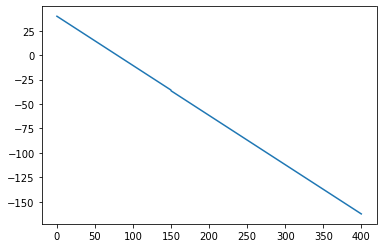

In [48]:
API.concrete_beam.plotShearDesignDiagram()

In [ ]:
fc.Node.

(<matplotlib.axes._subplots.AxesSubplot at 0x121026610>,
 <ezdxf.layouts.layout.Modelspace at 0x122979160>)

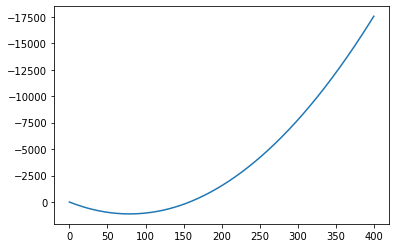

In [47]:
API.concrete_beam.plotMomentumDiagram()

(<matplotlib.axes._subplots.AxesSubplot at 0x1227d54f0>,
 <ezdxf.layouts.layout.Modelspace at 0x12126fa60>)

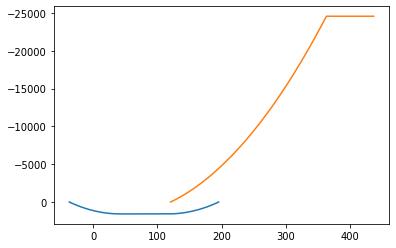

In [46]:
API.concrete_beam.long_steel_bars_solution_info.plotDecalagedMomentumDesignDiagram()

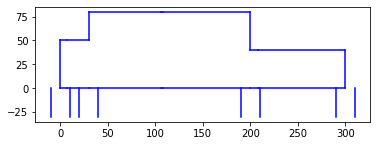

In [42]:
if len(plot_data_splited) == 1:
    ax, _ = getattr(concrete_bream, plot_data_splited[0])()
    
elif len(plot_data_splited) == 2:
    ax, _ = getattr(getattr(concrete_bream,
                            plot_data_splited[0])
                   , plot_data_splited[1])()

(<matplotlib.axes._subplots.AxesSubplot at 0x12179f1c0>,
 <ezdxf.layouts.layout.Modelspace at 0x121e4db20>)

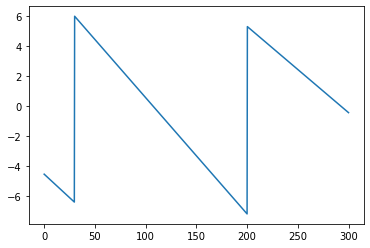

In [15]:
self.plotShearDiagram()

In [6]:
import datetime


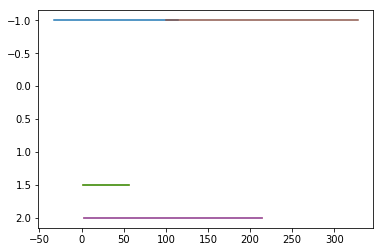

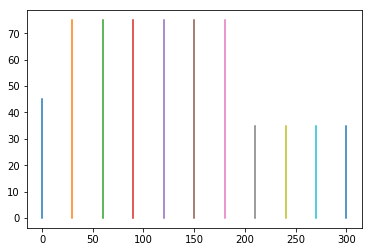

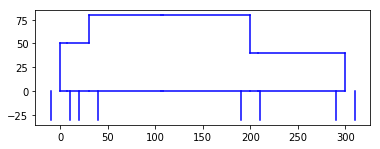

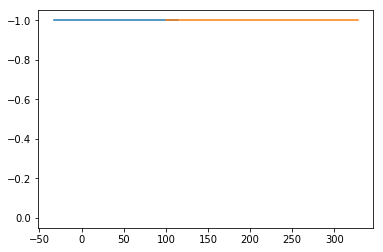

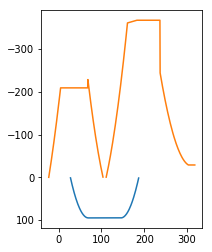

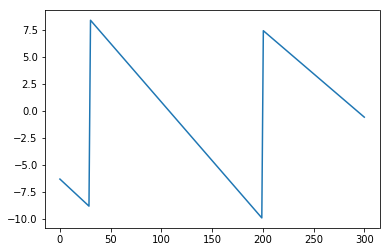

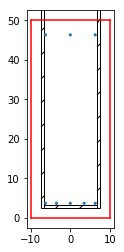

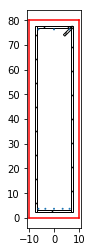

In [11]:
file_name = False
file_name = datetime.datetime.now().strftime("%d-%m-%Y %H-%m-%S") if file_name == False else file_name
column_height = 30
gap = 50
scale_y_long_bar = 10
max_height = max([ section.height for section in self.beam_elements.sections ])
transversal_plot_positions = [20, 150]


# Positive Long bar draw
positive_long_steel_bar = fc.LongSteelBars(self.long_steel_bars[self.long_steel_bars.areas > 0])
start_y_bottom = -max(positive_long_steel_bar.areas)*scale_y_long_bar - 2*gap - max_height
_, msp = self.long_steel_bars.plot(scale_y=scale_y_long_bar, xy_position=(0,start_y_bottom))

# Plot transversal bars
start_y = gap + max_height
_, msp = self.transv_steel_bars.plotLong(msp=msp, xy_position=(0,-start_y))

# Beam draw
max_height = max([ section.height for section in self.beam_elements.sections ])
start_y = column_height
_, msp = self.plot(msp=msp, column_height=column_height, xy_position=(0,start_y))

# Negative Long Bar draw
negative_long_steel_bar = fc.LongSteelBars(self.long_steel_bars[self.long_steel_bars.areas < 0])
start_y += max_height + max(abs(negative_long_steel_bar.areas))*scale_y_long_bar + gap
_, msp = negative_long_steel_bar.plot(msp=msp, scale_y=scale_y_long_bar, xy_position=(0,start_y))


# Momentum decalaged draw
x, mm, mn = self.long_steel_bars_solution_info.getDecalagedMomentumDesignDiagram()
mm, mn = mm[np.invert(np.isnan(mm))], mn[np.invert(np.isnan(mn))]
minimum_momentum, maximum_momentum = abs(min(min(mn), min(mm), 0)), abs(max(max(mn), max(mm), 0))
start_y += minimum_momentum + gap

_, msp = self.long_steel_bars_solution_info.plotDecalagedMomentumDesignDiagram(msp=msp, xy_position=(0,start_y))

# Shear draw

#x, sd = self.getShearDesignDiagram()
#minimum_shear, maximum_shear = abs(min(min(sd), min(sd), 0)), abs(max(max(sd), max(sd), 0))
start_y += maximum_momentum + gap
ax, msp = self.plotShearDesignDiagram(msp=msp, xy_position=(0,start_y))

transversal_x = self.length
for position in transversal_plot_positions:
    transversal_x += gap + self.getBeamElementInX(position)[1].section.width(0)
    ax, msp = self.plotTransversalInX(position, msp=msp, xy_position=(transversal_x, 0))

viewport_height = start_y+abs(start_y_bottom)
msp.doc.set_modelspace_vport(height=viewport_height, center=(transversal_x/2, start_y_bottom+viewport_height/2))

msp.doc.saveas("FConcrete Draw {}.dxf".format(file_name))


In [30]:
section = self.getBeamElementInX(20)[1].section.width(0)

In [29]:
section

20.0

In [11]:
ax, msp = self.plotTransversalInX(200)
ax, msp = self.plotTransversalInX(300, msp=msp, xy_position=(100, 0))
msp.doc.saveas("sections.dxf")

dict_keys(['msp', 'scale_y', 'xy_position'])


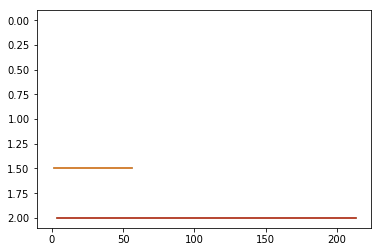

dict_keys(['msp', 'scale_y', 'xy_position'])


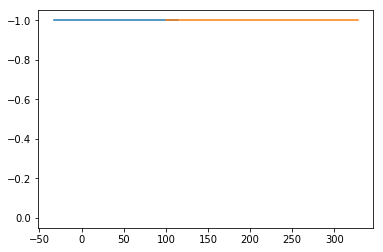

In [ ]:
self.long_steel_bars_solution_info.plotLon(msp=msp, xy_position=(0,start_y))

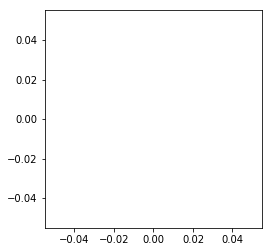

In [8]:
_, ax = fc.helpers.getAxis()
ax.set_aspect("equal")

In [40]:

splits_start = splits_end = []
last = start = 0
y_data = xy_data[:, 1]
for index, y in enumerate(y_data):
    y_before = y_data[index-1] if index>0 else 1
    y_after = y_data[index+1] if index<len(y_data)-1 else np.nan
    if np.isnan(y_before) and not np.isnan(y):
        splits_start = [*splits_start, index]
    elif np.isnan(y_after) and not np.isnan(y):
        splits_end = [*splits_end, index]


array_of_xy_data = []
for start, end in zip(splits_start, splits_end):
    array_of_xy_data = [*array_of_xy_data, xy_data[start:end]]

(array([0., 0.]), array([ 0., 50.]))